In [63]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Github_Project/diabetes.csv')
df.head(3)
# https://www.kaggle.com/uciml/pima-indians-diabetes-database

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# to check the type of variables- continuous/categorical
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

In [ ]:
# to check the type of variables- continuous/categorical
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
# Outcome is categorical
df['Outcome'] = df['Outcome'].astype('object')
df['Outcome'] = df.Outcome.replace({1: "Diabetic", 0: "Healthy"})
df['Outcome'].unique()

array(['Diabetic', 'Healthy'], dtype=object)

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

Healthy     500
Diabetic    268
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'Diabetic Classes')

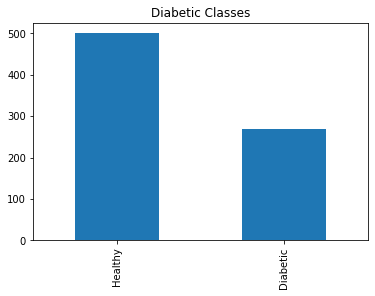

In [ ]:
# to see the distribution in Outcome
print(df.Outcome.value_counts())
df['Outcome'].value_counts().plot(kind='bar').set_title('Diabetic Classes')

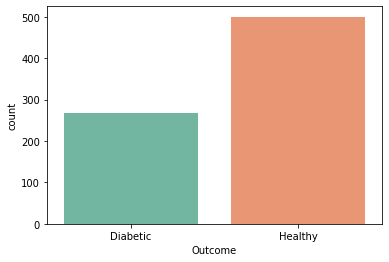

In [ ]:
# different way of visualization
sns.countplot(x='Outcome', data=df, palette='Set2')

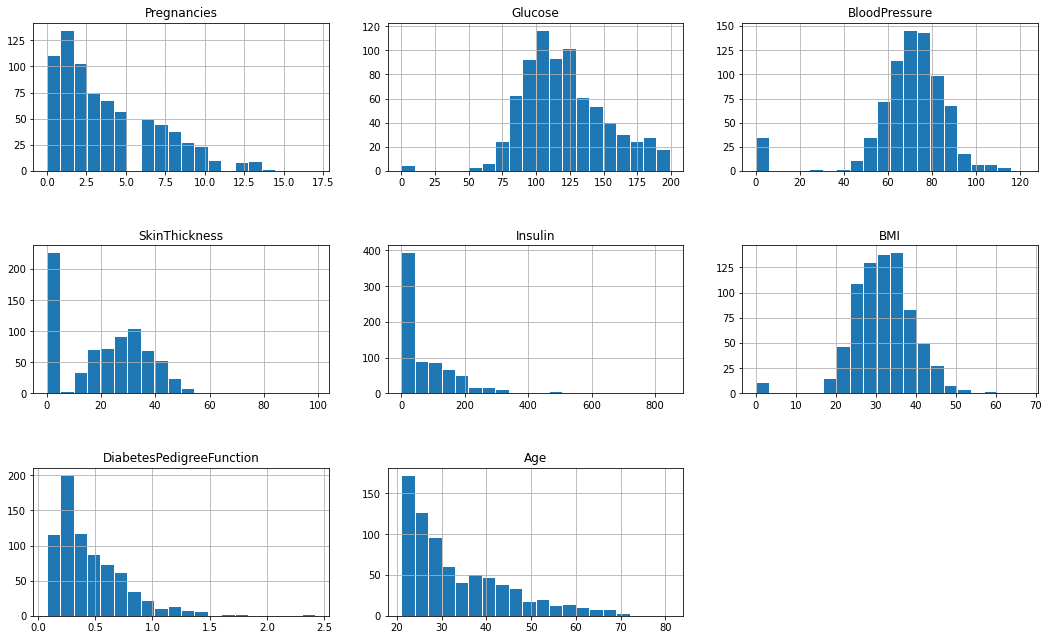

In [ ]:
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df[i].hist(bins=20,edgecolor='white')
    plt.title(i)
plt.show()

In [ ]:
# min value for 'Glucose','BloodPressure','SkinThickness','Insulin','BMI' is '0'
df.Glucose.replace(0, np.nan, inplace=True)
df.Glucose.replace(np.nan, df['Glucose'].mean(), inplace=True)
df.BloodPressure.replace(0, np.nan, inplace=True)
df.BloodPressure.replace(np.nan, df['BloodPressure'].mean(), inplace=True)
df.SkinThickness.replace(0, np.nan, inplace=True)
df.SkinThickness.replace(np.nan, df['SkinThickness'].mean(), inplace=True)
df.Insulin.replace(0, np.nan, inplace=True)
df.Insulin.replace(np.nan, df['Insulin'].mean(), inplace=True)
df.BMI.replace(0, np.nan, inplace=True)
df.BMI.replace(np.nan, df['BMI'].mean(), inplace=True)

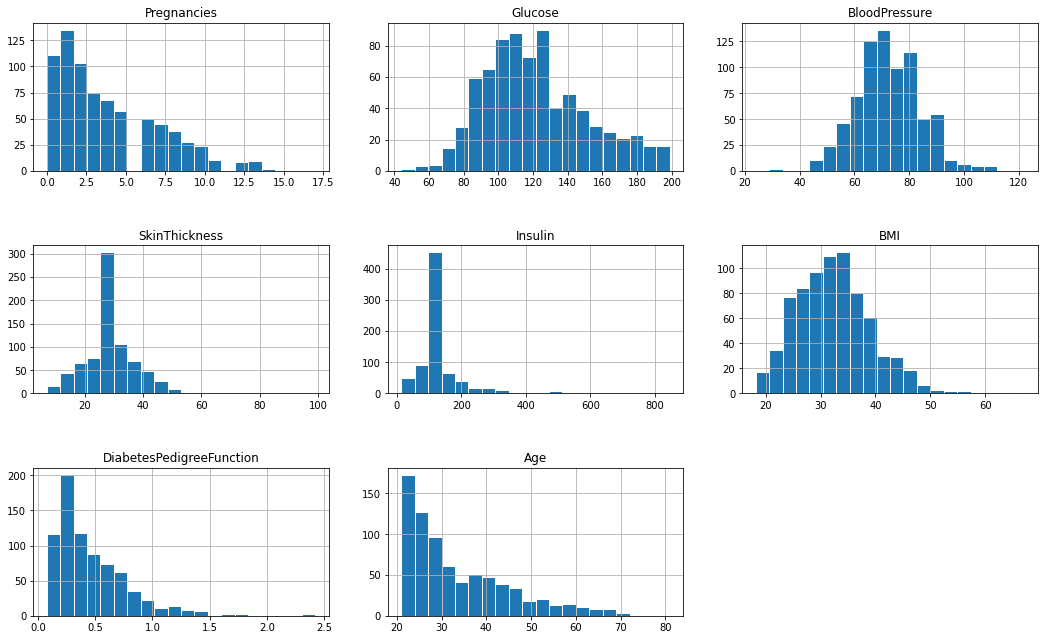

In [ ]:
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df[i].hist(bins=20,edgecolor='white')
    plt.title(i)
plt.show()

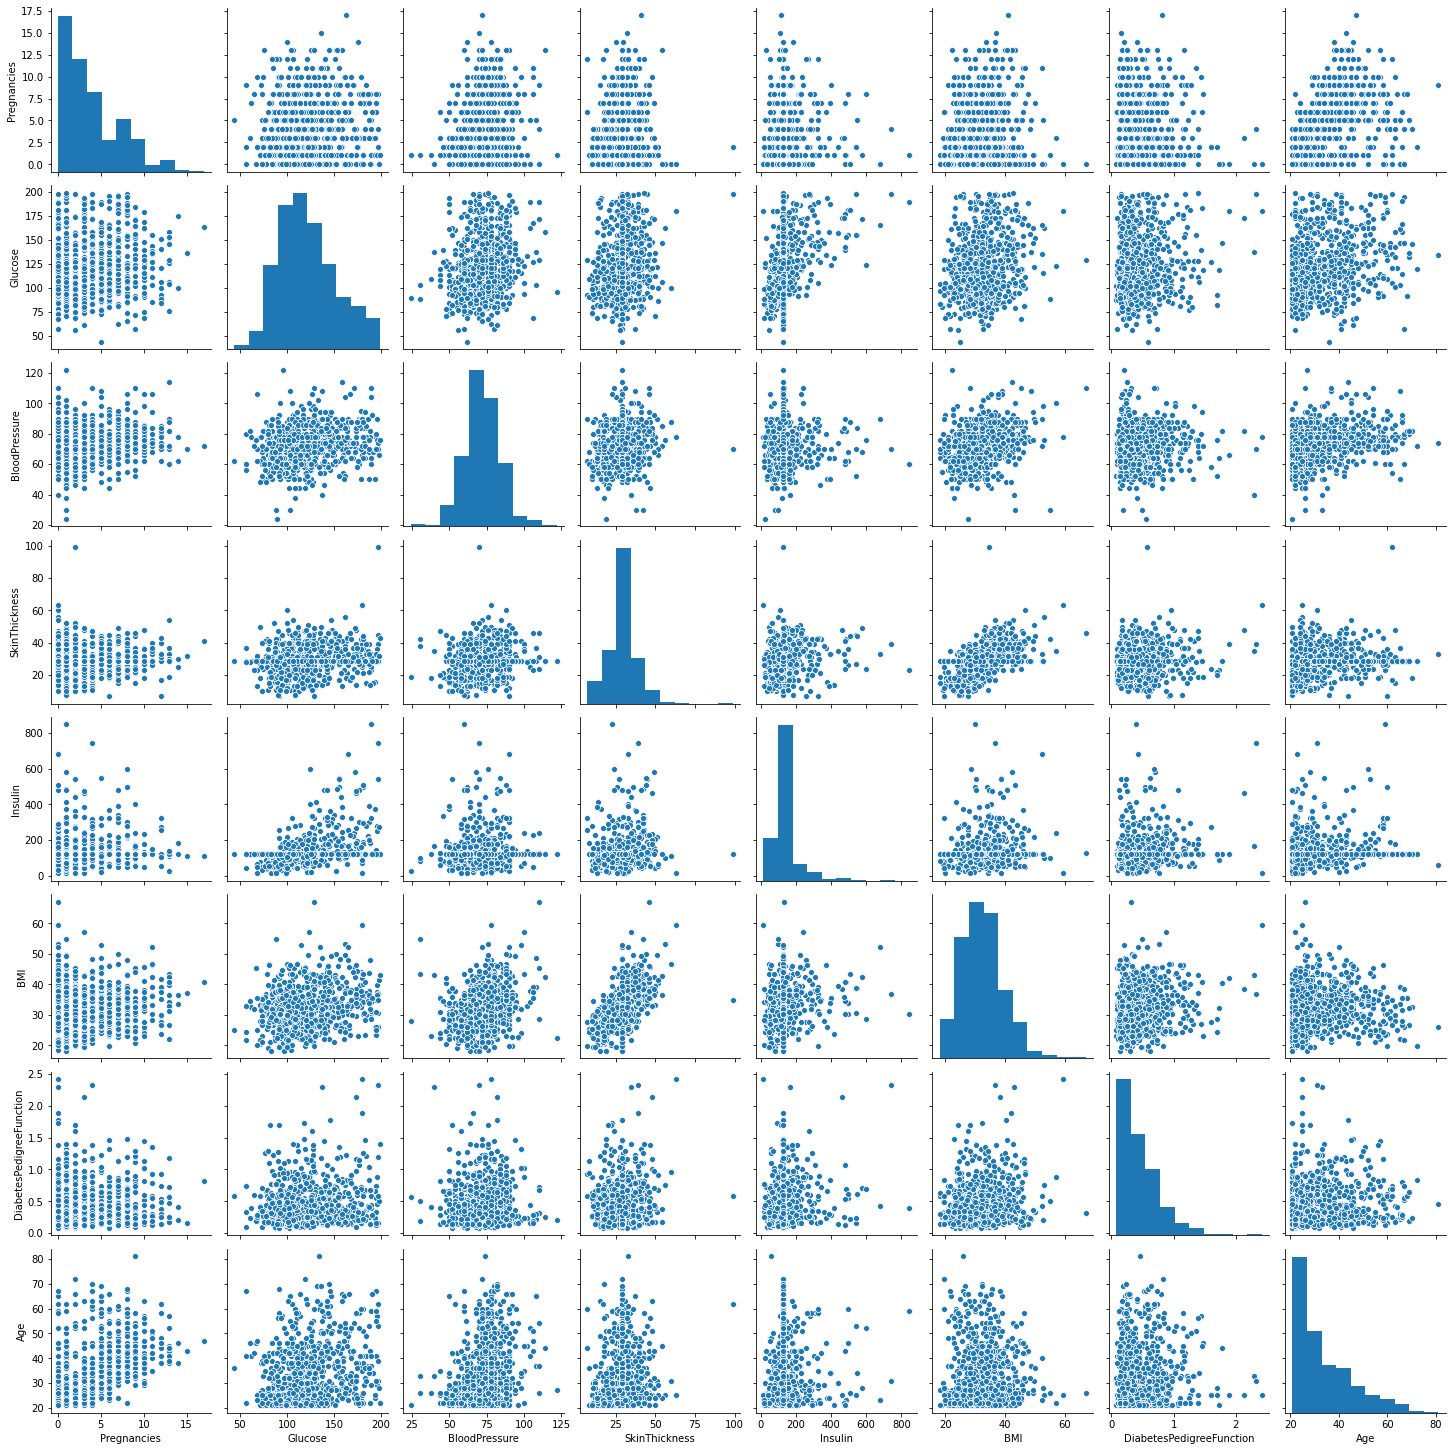

In [ ]:
sns.pairplot(df)

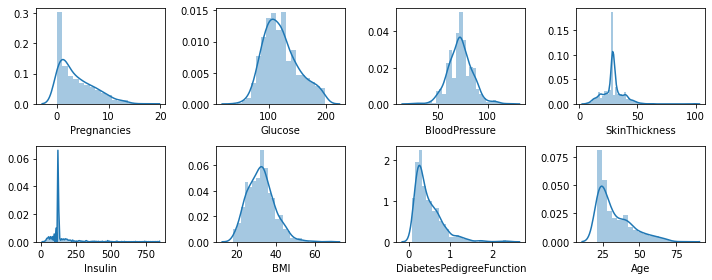

In [ ]:
# distribution plot to see normal distribution
rows = 2        
cols = 4
fig, ax = plt.subplots(nrows= rows, ncols=cols, figsize=(10,4))
col = df.columns
index = 0

for i in range(rows):
  for j in range(cols):
    sns.distplot(df[col[index]], ax = ax[i][j]) 
    index = index + 1  # means row of features

plt.tight_layout() 

(8.5, -0.5)

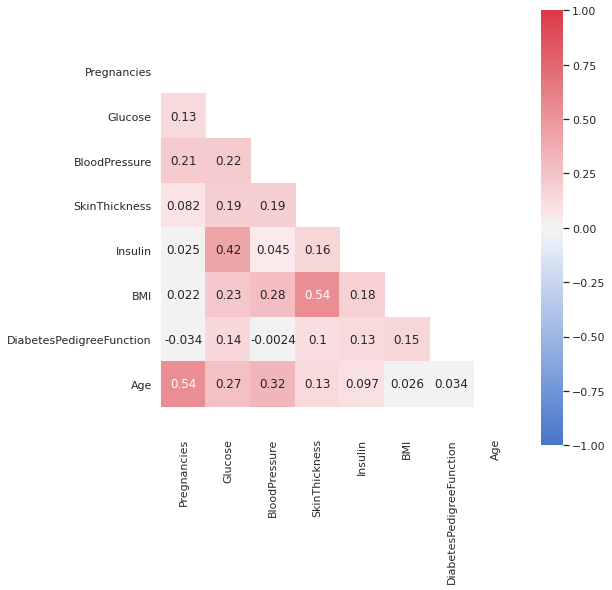

In [ ]:
# Correlation Matrix Heatmap Visualization
# Create a custom color palette, as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255 

sns.set(style="white")
mask = np.zeros_like(df.corr(), dtype=np.bool) # Generate a mask for the upper triangle
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(8,8))# Set up the matplotlib figure to control size of heatmap
cmap = sns.diverging_palette(255, 10, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, annot=True, square=True, cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot display corr label
bottom, top = ax.get_ylim()# to prevent Heatmap Cut-Off Issue
ax.set_ylim(bottom+0.5, top-0.5)

# Outliers correction

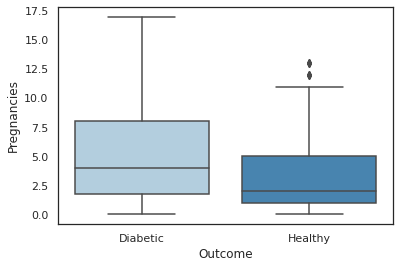

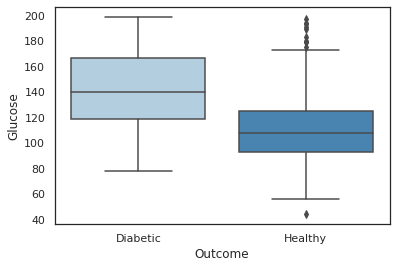

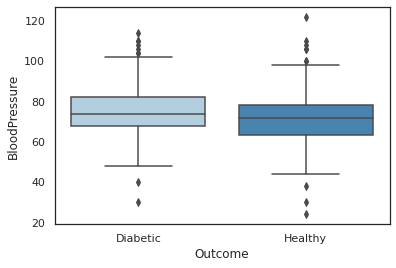

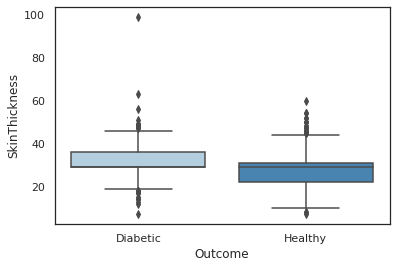

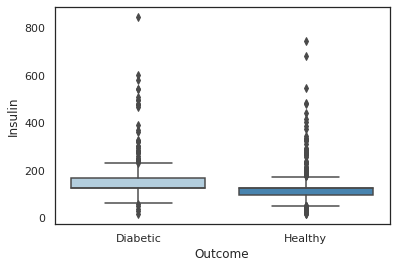

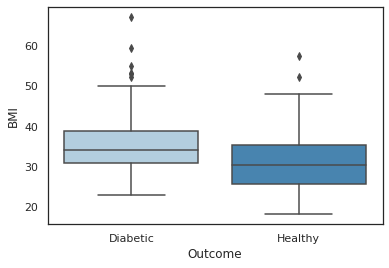

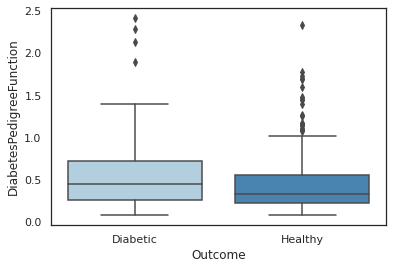

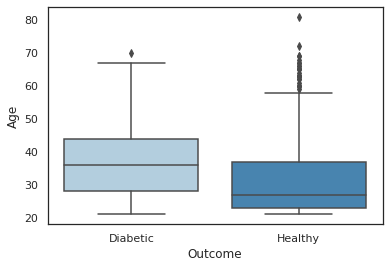

In [ ]:
# to analyze outliers
def boxplot(df: pd.DataFrame) -> None:
    fig, axis = plt.subplots()

    for col in df.columns:
        if col != 'Outcome':
            sns.boxplot(x='Outcome', y=col, data=df, palette='Blues')
            plt.show()

boxplot(df)

# There is an abnormal observation in Pregnancies, >14

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

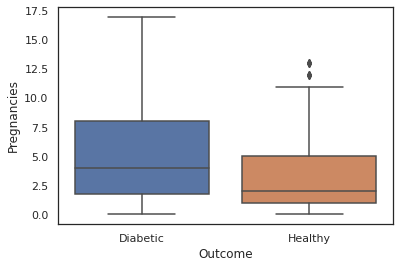

In [ ]:
sns.boxplot(x='Outcome', y='Pregnancies', data=df,)
df['Pregnancies'].value_counts()

In [ ]:
mean = df.loc[df['Pregnancies']>13, 'Pregnancies'].mean()
df.loc[df.Pregnancies > 13, 'Pregnancies'] = np.nan
df.replace(mean,inplace=True)

Pregnancies                 None
Glucose                     None
BloodPressure               None
SkinThickness               None
Insulin                     None
BMI                         None
DiabetesPedigreeFunction    None
Age                         None
Outcome                     None
dtype: object

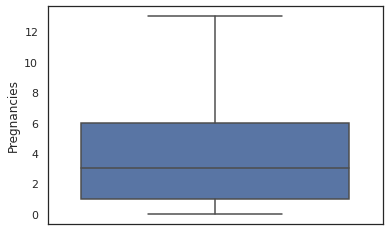

In [ ]:
sns.boxplot( y='Pregnancies', data=df)

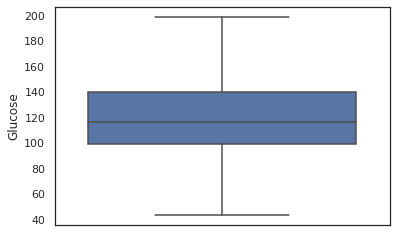

In [ ]:
sns.boxplot( y='Glucose', data=df)

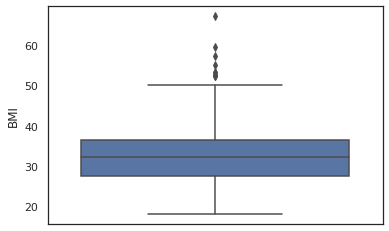

In [ ]:
sns.boxplot( y='BMI', data=df)

In [ ]:
df["BMI"] = np.where(df["BMI"] >48, mean,df['BMI'])

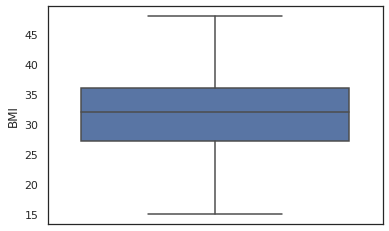

In [ ]:
sns.boxplot( y='BMI', data=df)

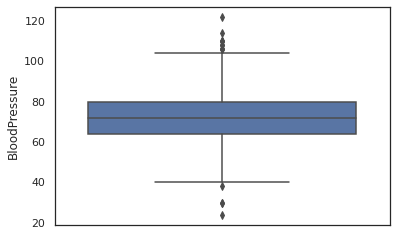

In [ ]:
sns.boxplot( y='BloodPressure', data=df)

In [ ]:
df["BloodPressure"] = np.where(df["BloodPressure"] >100, mean,df['BloodPressure'])
df["BloodPressure"] = np.where(df["BloodPressure"] <40, mean,df['BloodPressure'])

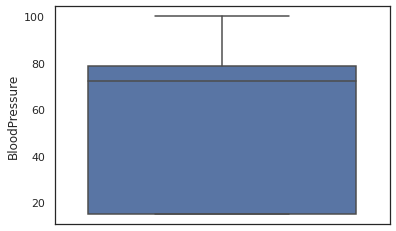

In [ ]:
sns.boxplot( y='BloodPressure', data=df)

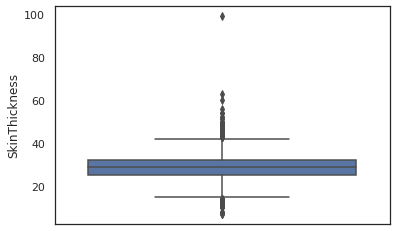

In [ ]:
sns.boxplot( y='SkinThickness', data=df)

In [ ]:
df["SkinThickness"] = np.where(df["SkinThickness"] >32, mean,df['SkinThickness'])
df["SkinThickness"] = np.where(df["SkinThickness"] <27, mean,df['SkinThickness'])

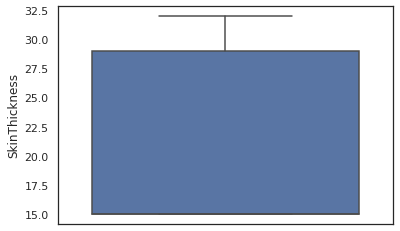

In [ ]:
sns.boxplot( y='SkinThickness', data=df)